# KNN (K-Nearest Neighbors)

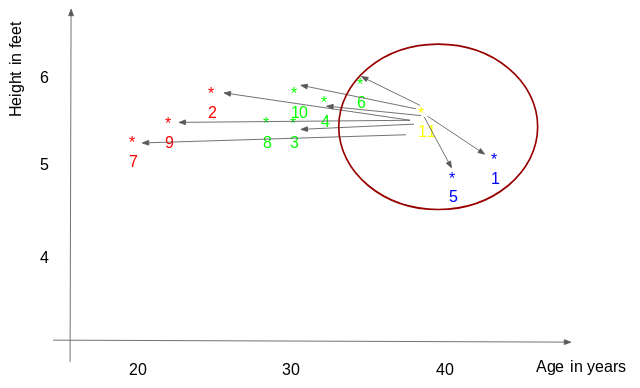

## Model

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
hit = pd.read_csv("../../Datasets/Hitters.csv")
df = hit.copy()
df = df.dropna()
ms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df['Salary']
X_ = df.drop(['Salary', 'Division', 'League', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, ms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

In [2]:
from sklearn.neighbors import KNeighborsRegressor

In [3]:
knn_model = KNeighborsRegressor().fit(X_train, y_train)

## Prediction

In [4]:
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
y_pred = knn_model.predict(X_test)

In [6]:
np.sqrt(mean_squared_error(y_test, y_pred))

426.6570764525201

In [7]:
r2_score(y_test, y_pred)

0.1590920400477076

## Model Tuning

In [8]:
from sklearn.model_selection import GridSearchCV

In [9]:
params = {'n_neighbors': np.arange(1, 30, 1)}

In [10]:
knn = KNeighborsRegressor()

In [11]:
knn_cv = GridSearchCV(knn, params, cv=10)

In [12]:
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [13]:
knn_cv.best_params_

{'n_neighbors': 8}

In [14]:
knn_tuned = KNeighborsRegressor(n_neighbors=knn_cv.best_params_['n_neighbors'])

In [15]:
knn_tuned.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=8)

In [16]:
y_pred = knn_tuned.predict(X_test)

In [17]:
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
np.sqrt(mean_squared_error(y_test, y_pred))

413.7094731463598

In [19]:
r2_score(y_test, y_pred)

0.2093550739421146